In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import pickle

In [2]:
data = pd.read_csv('Heartattack.csv')


In [3]:
data.head()


,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [4]:
X = data.drop(columns=['class'])  # Features (all columns except 'class')
y = data['class']  # Target variable


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score , f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


In [6]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=42)
print(f'Shape of X_train {X_train.shape}')
print(f'Shape of  y_train {y_train.shape}')
print(f'Shape of X_test{X_test.shape}')
print(f'Shape of y_test {y_test.shape}')


Shape of X_train (1055, 8)
Shape of  y_train (1055,)
Shape of X_test(264, 8)
Shape of y_test (264,)


In [7]:
# Decision Tree
cart = DecisionTreeClassifier()
cart.fit(X_train , y_train)
y_preds = cart.predict(X_test)
print(accuracy_score(y_test ,y_preds)*100)

97.72727272727273


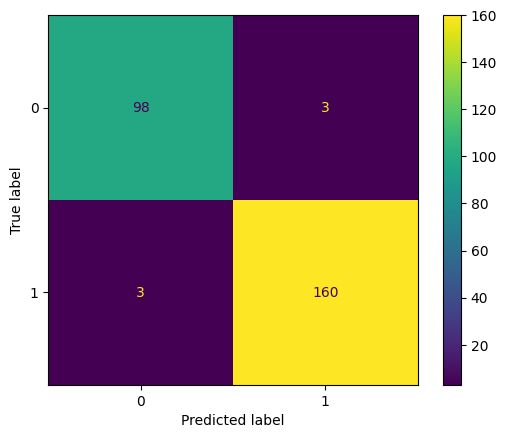

In [8]:
cm= confusion_matrix (y_test , y_preds)
cm_plot = ConfusionMatrixDisplay(cm)
cm_plot.plot()
plt.savefig('cm-decisiontree.png')

In [9]:
cr = classification_report(y_test, y_preds)
print(cr)

              precision    recall  f1-score   support

    negative       0.97      0.97      0.97       101
    positive       0.98      0.98      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



In [10]:
#Naive_bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_preds = gnb.predict(X_test)
print(accuracy_score(y_test ,y_preds)*100)

78.78787878787878


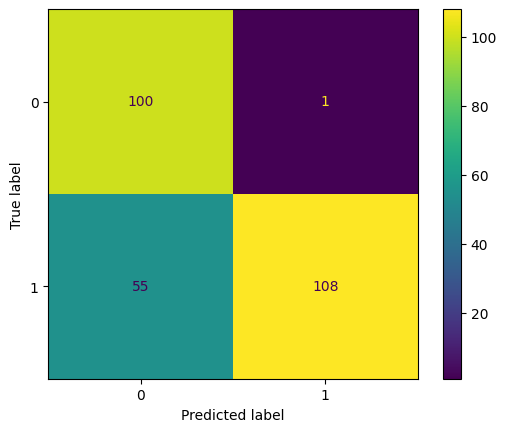

In [11]:
cm= confusion_matrix (y_test , y_preds)
cm_plot = ConfusionMatrixDisplay(cm)
cm_plot.plot()
plt.savefig('cm-naivebayes.png')

In [12]:
# SVM 
svm= SVC(gamma="auto")
svm.fit(X_train,y_train)
y_preds = svm.predict(X_test)
print(accuracy_score(y_test ,y_preds)*100)

62.121212121212125


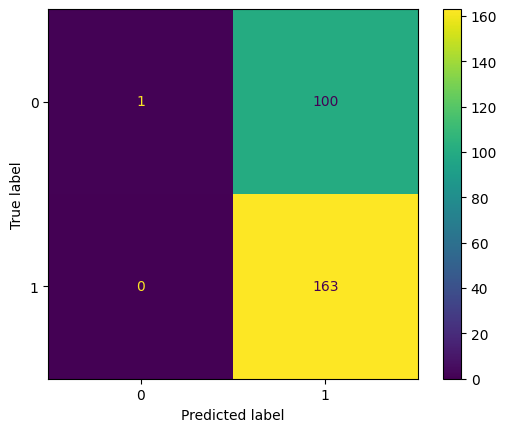

In [13]:
cm= confusion_matrix (y_test , y_preds)
cm_plot = ConfusionMatrixDisplay(cm)
cm_plot.plot()
plt.savefig('cm-svm.png')

In [14]:
# Artificial Neural Network
mlp= MLPClassifier(hidden_layer_sizes =(150,100,150) , max_iter=300, activation ='relu', solver='adam', random_state=42)
mlp.fit(X_train,y_train)
y_preds =mlp.predict(X_test)
print(accuracy_score(y_test ,y_preds)*100)

75.37878787878788


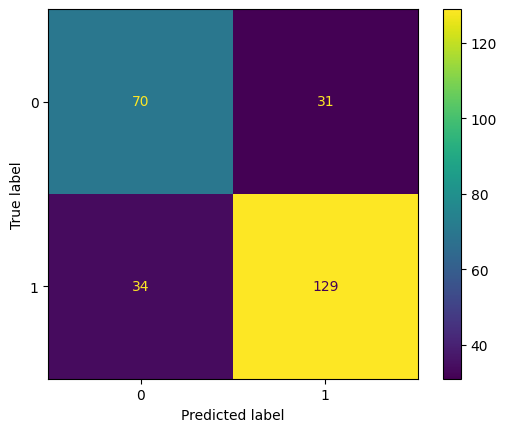

In [15]:
cm= confusion_matrix (y_test , y_preds)
cm_plot = ConfusionMatrixDisplay(cm)
cm_plot.plot()
plt.savefig('cm-ANN.png')

In [25]:
X_test.iloc[0],y_test.iloc[0]

(age               76.000
 gender             1.000
 impluse           73.000
 pressurehight    114.000
 pressurelow       68.000
 glucose          144.000
 kcm              297.500
 troponin           0.024
 Name: 677, dtype: float64,
 'positive')

In [28]:
answer = cart.predict([[76,1,73,114,68,144,297,0.024]])
print(answer[0])

positive


C:\Users\deene\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [30]:
with open('classification.pkl', 'wb') as file:
    pickle.dump(cart, file)